In [ ]:
import numpy as np
import random
random.seed(42)

In [ ]:
class EpsilonGreedy:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)  # Number of times each arm is pulled
        self.values = np.zeros(n_arms)  # Estimated values of each arm

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward



In [ ]:
n_arms = 3
arms = [{'mu': random.randint(100,5000), 'sigma': random.uniform(10,100)} for _ in range(n_arms)]


epsilons = [0.5, 0.1, 0]
n_trials = 100
tots = {}
for epsilon in epsilons:
    agent = EpsilonGreedy(n_arms, epsilon)
    rewards = [0]

    for t in range(n_trials):
        arm = agent.select_arm()
        reward = np.random.normal(arms[arm]['mu'], arms[arm]['sigma'])
        agent.update(arm, reward)
        rewards.append(rewards[-1] + reward)

    tots[epsilon] = rewards

In [42]:
print(tots)

{0.5: [0, 2356.0617107181256, 4694.955109465673, 7058.860591988129, 9473.851277052367, 10599.164793098564, 12004.137242727364, 14300.794817020102, 16717.009246910744, 19034.32994424271, 21424.480772051713, 23745.740821178457, 24781.29753464238, 27112.57599796294, 29470.50862674419, 30481.623191075607, 31478.218127892946, 33823.22414235487, 36184.98196288866, 38537.25335975939, 40854.56417004741, 43231.26565477887, 45577.507221864136, 47943.49031961736, 50314.65331393316, 52644.51805796896, 55008.61085072196, 57371.51745510762, 59742.403327922235, 61031.30684195738, 63385.21065602722, 65707.34606782526, 66736.79936146797, 69099.41599201466, 70096.40386604377, 72461.01065615025, 74842.24700589005, 77182.36853170939, 79523.83206784746, 81910.53334460428, 84250.20012372964, 85497.8960980635, 87804.06973939885, 90206.60818523042, 91205.31196680463, 93526.66607002796, 95862.78205507422, 98201.8868243987, 100573.43149063799, 102912.09706982796, 104210.05164244463, 106534.37174522696, 107652.3

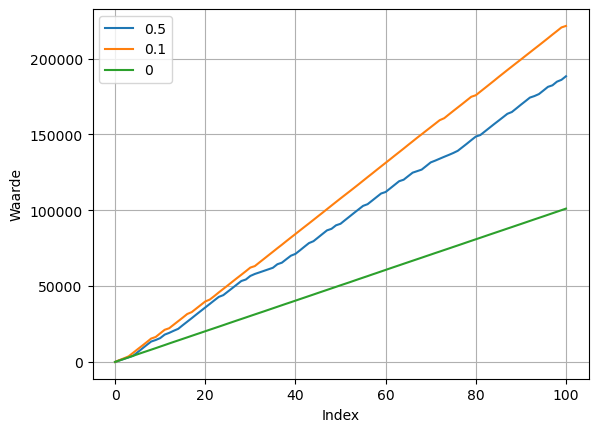

In [45]:
import matplotlib.pyplot as plt


for k, t in tots.items():
    plt.plot(list(t), label=k)


plt.xlabel("Index")
plt.ylabel("Waarde")
plt.legend()
plt.grid(True)

# Plot weergeven
plt.show()